<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="figures/PDSH-cover-small.png">
*This notebook contains an excerpt from the book Machine Learning for OpenCV by Michael Beyeler; the content is available [on GitHub](https://github.com/mbeyeler/opencv-machine-learning).*

*The text is released under the [CC-BY-NC-ND license](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode), and code is released under the [MIT license](https://opensource.org/licenses/MIT). If you find this content useful, please consider supporting the work by [buying the book](https://github.com/mbeyeler/opencv-machine-learning)!*

<!--NAVIGATION-->
< [## Training the model](03.04-Ridge-Regression.ipynb) | [Contents](../README.md) | [None](05.00-Using-Decision-Trees-to-Make-a-Medical-Diagnosis.ipynb) >

# Preprocessing Data

## Standardizing Features

Standardization of datasets is a common requirement for many machine learning estimators; they might behave badly if the individual features do not more or less look like standard normally distributed data: Gaussian with zero mean and unit variance.

In [1]:
from sklearn import preprocessing
import numpy as np
X = np.array([[ 1., -2.,  2.],
              [ 3.,  0.,  0.],
              [ 0.,  1., -1.]])

In [2]:
X_scaled = preprocessing.scale(X)
X_scaled

array([[-0.26726124, -1.33630621,  1.33630621],
       [ 1.33630621,  0.26726124, -0.26726124],
       [-1.06904497,  1.06904497, -1.06904497]])

In [3]:
X_scaled.mean(axis=0)

array([  7.40148683e-17,   0.00000000e+00,   0.00000000e+00])

In [4]:
X_scaled.std(axis=0)

array([ 1.,  1.,  1.])

## Normalizing Features

Normalization is the process of scaling individual samples to have unit norm. This process can be useful if you plan to use a quadratic form such as the dot-product or any other kernel to quantify the similarity of any pair of samples.

In [5]:
X_normalized_l1 = preprocessing.normalize(X, norm='l1')
X_normalized_l1

array([[ 0.2, -0.4,  0.4],
       [ 1. ,  0. ,  0. ],
       [ 0. ,  0.5, -0.5]])

In [6]:
X_normalized_l2 = preprocessing.normalize(X, norm='l2')
X_normalized_l2

array([[ 0.33333333, -0.66666667,  0.66666667],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.70710678, -0.70710678]])

## Scaling Features to a Range

An alternative standardization is scaling features to lie between a given minimum and maximum value, often between zero and one, or so that the maximum absolute value of each feature is scaled to unit size.

In [7]:
min_max_scaler = preprocessing.MinMaxScaler()
X_min_max = min_max_scaler.fit_transform(X)
X_min_max

array([[ 0.33333333,  0.        ,  1.        ],
       [ 1.        ,  0.66666667,  0.33333333],
       [ 0.        ,  1.        ,  0.        ]])

In [8]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-10, 10))
X_min_max2 = min_max_scaler.fit_transform(X)
X_min_max2

array([[ -3.33333333, -10.        ,  10.        ],
       [ 10.        ,   3.33333333,  -3.33333333],
       [-10.        ,  10.        , -10.        ]])

## Binarizing Features

In [9]:
X

array([[ 1., -2.,  2.],
       [ 3.,  0.,  0.],
       [ 0.,  1., -1.]])

In [10]:
binarizer = preprocessing.Binarizer(threshold=0.5)
X_binarized = binarizer.transform(X)
X_binarized

array([[ 1.,  0.,  1.],
       [ 1.,  0.,  0.],
       [ 0.,  1.,  0.]])

## Whitening the Data

In [11]:
mean = [20, 20]
cov = [[5, 0], [25, 25]]
x, y = np.random.multivariate_normal(mean, cov, 1000).T

In [12]:
X = np.vstack((x, y)).T

In [13]:
import cv2
mu, eig = cv2.PCACompute(X, np.array([]))
eig

array([[ 0.71185039,  0.70233114],
       [-0.70233114,  0.71185039]])

In [14]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

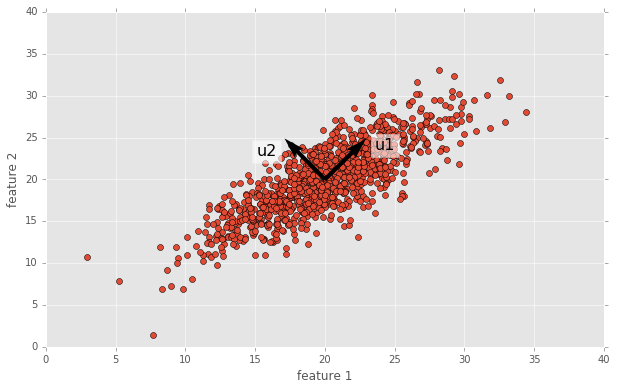

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o', zorder=1)
plt.quiver(mean[0], mean[1], eig[:, 0], eig[:, 1], zorder=3, scale=0.2, units='xy')
plt.text(mean[0] + 5 * eig[0, 0], mean[1] + 5 * eig[0, 1], 'u1', zorder=5, 
         fontsize=16, bbox=dict(facecolor='white', alpha=0.6))
plt.text(mean[0] + 7 * eig[1, 0], mean[1] + 4 * eig[1, 1], 'u2', zorder=5, 
         fontsize=16, bbox=dict(facecolor='white', alpha=0.6))
plt.axis([0, 40, 0, 40])
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.savefig('pca.png')

In [16]:
X2 = cv2.PCAProject(X, mu, eig)

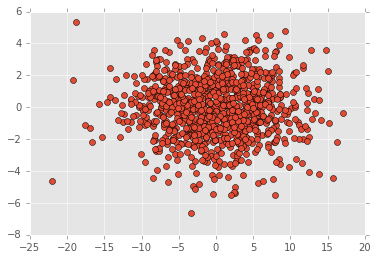

In [17]:
plt.plot(X2[:, 0], X2[:, 1], 'o')

In [18]:
cv2.PCACompute(X2, mu)

(array([[ 20.09338842,  20.14200611]]), array([[ 0.71995579,  0.69401992],
        [-0.69401992,  0.71995579]]))

## Handling Missing Data

In [19]:
import numpy as np
from numpy import nan
X = np.array([[ nan, 0,   3  ],
              [ 2,   9,  -8  ],
              [ 1,   nan, 1  ],
              [ 5,   2,   4  ],
              [ 7,   6,  -3  ]])

Strategy, choose from:
- 'mean'
- 'median'
- 'most_frequent'

In [20]:
from sklearn.preprocessing import Imputer
imp = Imputer(strategy='mean')
X2 = imp.fit_transform(X)
X2

array([[ 3.75,  0.  ,  3.  ],
       [ 2.  ,  9.  , -8.  ],
       [ 1.  ,  4.25,  1.  ],
       [ 5.  ,  2.  ,  4.  ],
       [ 7.  ,  6.  , -3.  ]])

In [21]:
np.mean(X[1:, 0]), X2[0, 0]

(3.75, 3.75)

In [22]:
imp = Imputer(strategy='median')
X3 = imp.fit_transform(X)
X3

array([[ 3.5,  0. ,  3. ],
       [ 2. ,  9. , -8. ],
       [ 1. ,  4. ,  1. ],
       [ 5. ,  2. ,  4. ],
       [ 7. ,  6. , -3. ]])

In [23]:
np.median(X[1:, 0]), X3[0, 0]

(3.5, 3.5)

<!--NAVIGATION-->
< [## Training the model](03.04-Ridge-Regression.ipynb) | [Contents](../README.md) | [None](05.00-Using-Decision-Trees-to-Make-a-Medical-Diagnosis.ipynb) >